In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks
from kneebow.rotor import Rotor
import datetime
from datetime import datetime,timedelta
from plotfunction import *
from detectfunction import *
from busketfunction import *
from loglogfoo import *

In [2]:
os.chdir('C:/Users/2925582/OneDrive - Universitetet i Stavanger/PHD/PHD code/Data')

# read file using numpy to read txt file
pressure = np.loadtxt('Pressure.txt')
rate = np.loadtxt('Rate.txt')

df_bhp = pd.DataFrame(pressure,columns = ['Time','Pressure'])
df_rate = pd.DataFrame(rate,columns = ['Time','Rate'])

In [3]:
# input
# p  =  prominance, w = width, d = distance
p = 100
# interval is the miminum length in the shut-in transient
interval = 45
# n means how many breakpoints in a zoomin picture
n = 13

PTA_f = detect_bottombp(df_bhp,p)
PTA_s = detect_topbp(df_bhp,PTA_f)
PTA = detect_PTA(df_bhp,PTA_f,PTA_s)
TI = detect_TI(PTA_f,PTA_s,interval)
T_s = TI[TI['label']=='shutin']
T_f = TI[TI['label']=='flowing']
detect_result(TI,interval)

There are 5 shut-in transients that longer than 45 hours.
The longest identified shut-in transient is 89 hours.
The shortest identified shut-in transient is 46 hours.


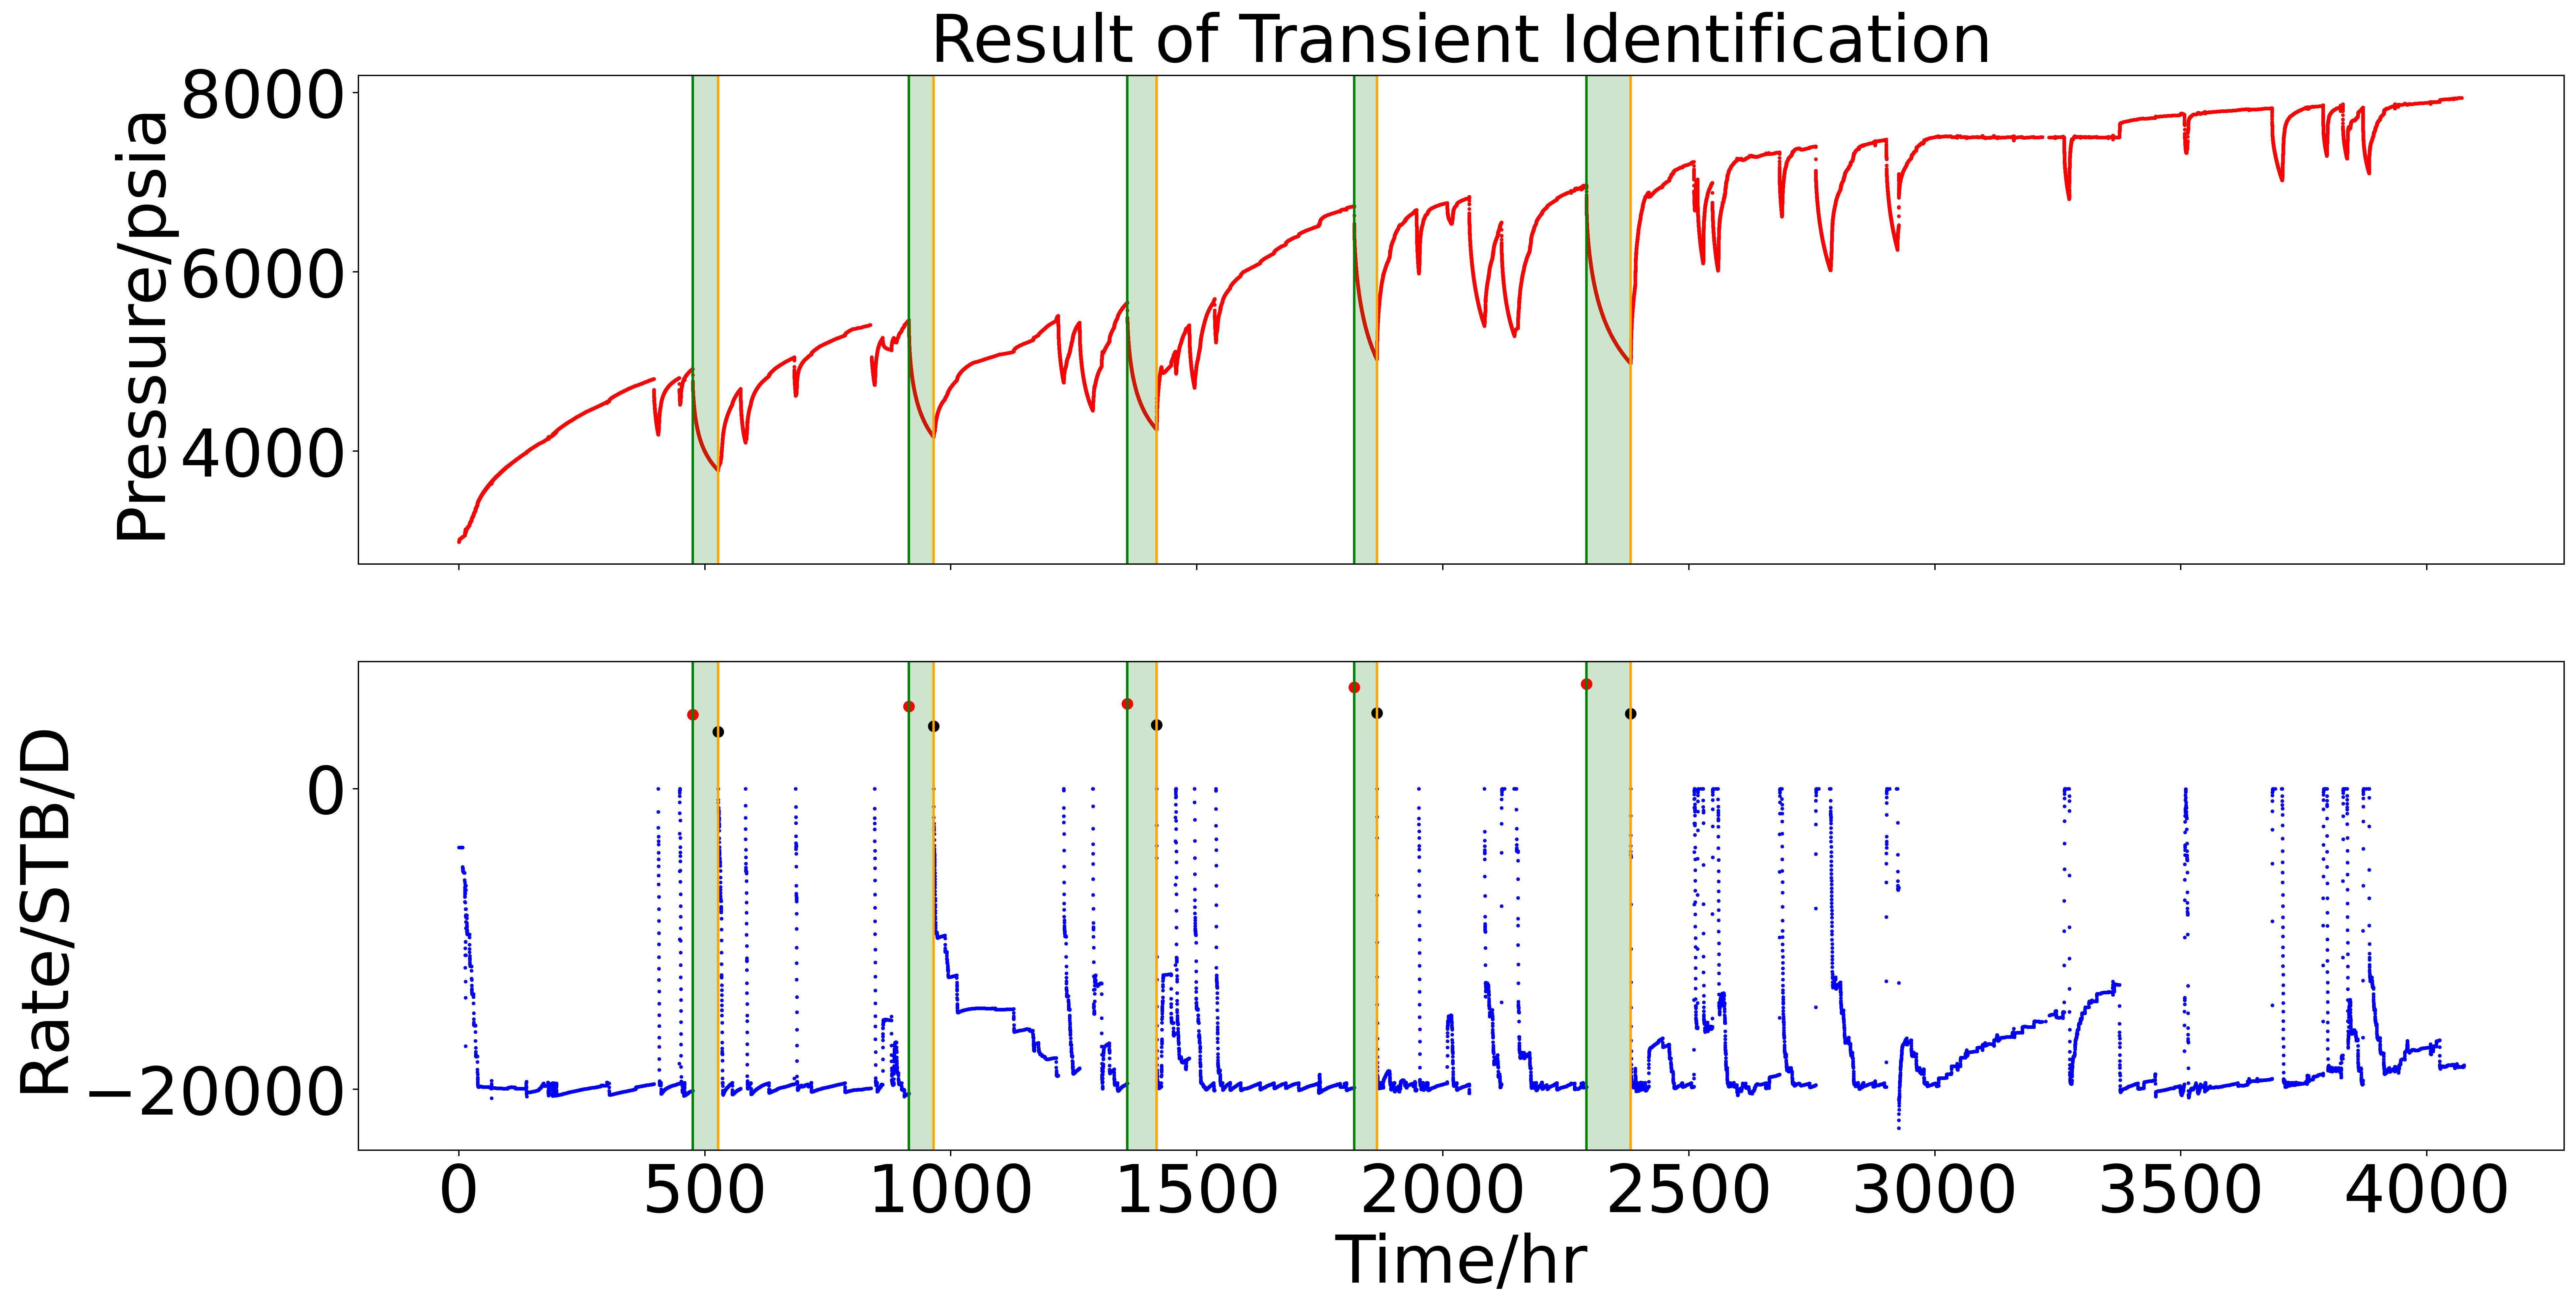

In [5]:
# plot using plot_area
plot_area(df_bhp,df_rate,T_s,T_f)
# plot T_s points
plt.scatter(T_s['Time'],T_s['Pressure'],color = 'red')  
# plot T_f points
plt.scatter(T_f['Time'],T_f['Pressure'],color = 'black')


In [4]:
# the data in the shut-in transients
df_bhp_list,df_rate_list = shutindata(df_bhp,df_rate,T_s,T_f)

# the data for calculating the derivative
df_bhp_list_log,df_rate_list_log = loglogdata(df_bhp,df_rate,T_f)

# the shutin length
shutin_length = calculate_shutin_length(T_f,T_s)

# the median rate before the shutin
median_rate_list = calculate_rate_median(df_rate,T_f,T_s,shutin_length)

# the exact rate value before the shutin
last_rate_list = calculate_rate_last(df_rate,T_f,T_s,shutin_length)


In [5]:
# load xlsx file
os.chdir('C:/Users/2925582/OneDrive - Universitetet i Stavanger/PHD/PHD code/Data/log')
df1 = pd.read_excel('12.xlsx', sheet_name='Transient 1',# from the 1st row
                    header=0)
df2 = pd.read_excel('12.xlsx', sheet_name='Transient 2',header = 0)
df3 = pd.read_excel('12.xlsx', sheet_name='Transient 3',header = 0)
df4 = pd.read_excel('12.xlsx', sheet_name='Transient 4',header = 0)
df5 = pd.read_excel('12.xlsx', sheet_name='Transient 5',header = 0)

# select the first 3 columns
df1 = df1.iloc[:,0:3]
df2 = df2.iloc[:,0:3]
df3 = df3.iloc[:,0:3]
df4 = df4.iloc[:,0:3]
df5 = df5.iloc[:,0:3]

# delect rows with nan
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()

# rename columns
df1.columns = ['t', 'p','dp']
df2.columns = ['t', 'p','dp']
df3.columns = ['t', 'p','dp']
df4.columns = ['t', 'p','dp']
df5.columns = ['t', 'p','dp']

Text(0.5, 1.0, 'loglog plot of Pressure and derivative')

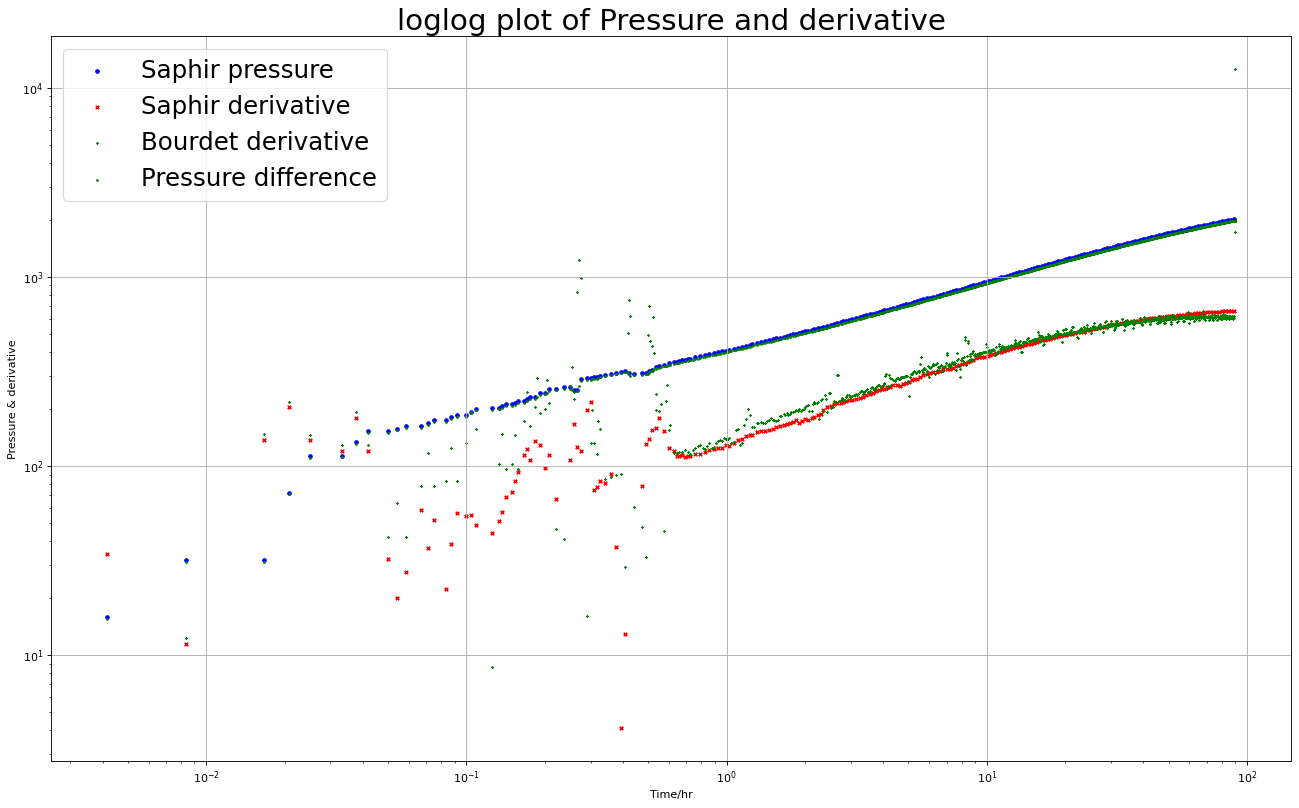

In [9]:
# plot the figure
plt.figure(figsize=(20,12),dpi=80)
plt.scatter(df5.t,df5.p,s = 10, marker = 'o',color = 'b',label = 'Saphir pressure')
plt.scatter(df5.t,df5.dp,s = 10, marker = 'x',color = 'r',label = 'Saphir derivative')

# plot the bourdet derivative
ttt_der,der,ttt,ppp = bourdet_der(median_rate_list,df_bhp_list,4,T_s,0.915)
plt.scatter(ttt_der,der,s = 2, marker = 'x',color = 'g',label = 'Bourdet derivative')
plt.scatter(ttt,ppp,s = 2, marker = 'o',color = 'g',label = 'Pressure difference')

#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')
# font size
plt.rcParams.update({'font.size': 22})
# grid
plt.grid()
plt.legend()
# title
plt.title('loglog plot of Pressure and derivative')

Text(0.5, 1.0, 'loglog plot of Pressure and derivative')

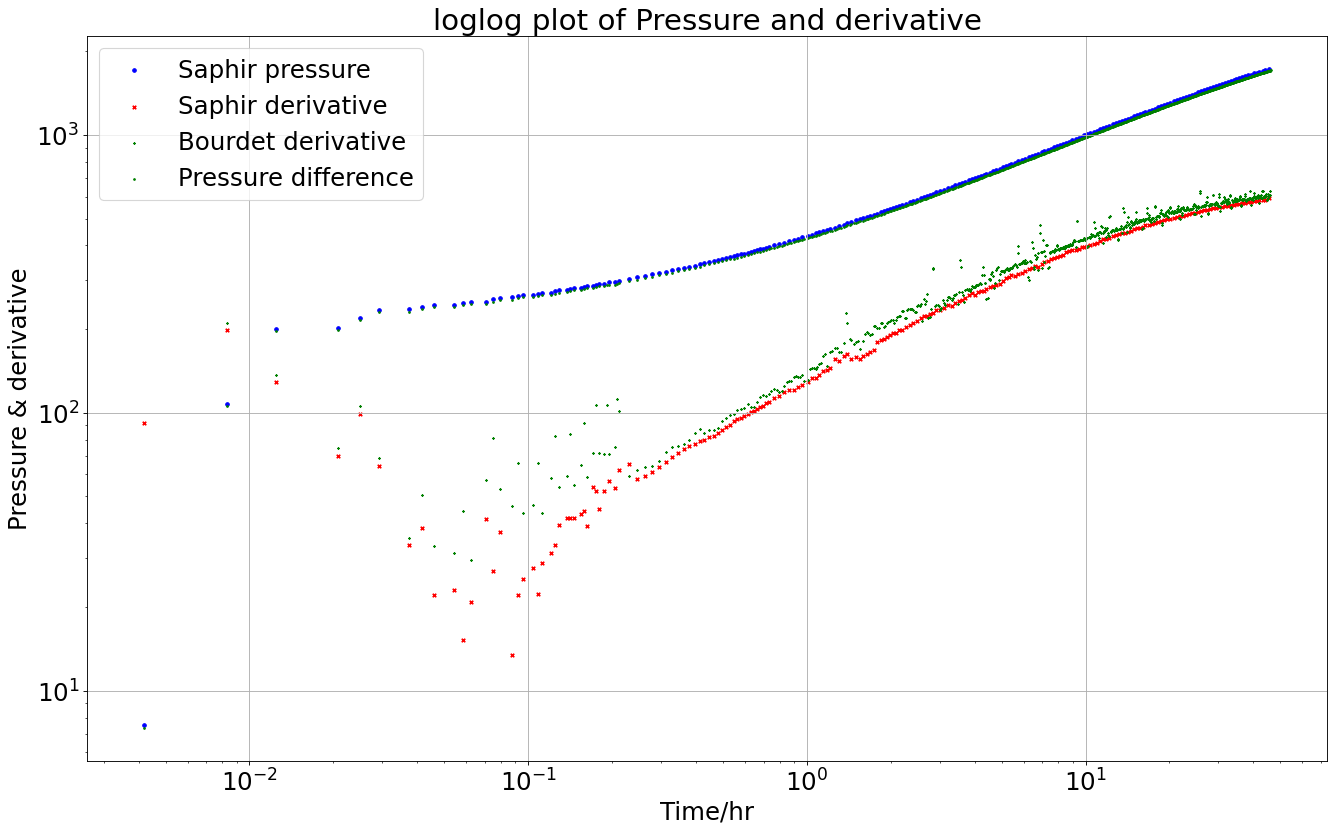

In [10]:
# plot the figure
plt.figure(figsize=(20,12),dpi=80)
plt.scatter(df4.t,df4.p,s = 10, marker = 'o',color = 'b',label = 'Saphir pressure')
plt.scatter(df4.t,df4.dp,s = 10, marker = 'x',color = 'r',label = 'Saphir derivative')

# plot the bourdet derivative
ttt_der,der,ttt,ppp = bourdet_der(median_rate_list,df_bhp_list,3,T_s,0.92)
plt.scatter(ttt_der,der,s = 2, marker = 'x',color = 'g',label = 'Bourdet derivative')
plt.scatter(ttt,ppp,s = 2, marker = 'o',color = 'g',label = 'Pressure difference')

#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')
# font size
plt.rcParams.update({'font.size': 22})
# grid
plt.grid()
plt.legend()
# title
plt.title('loglog plot of Pressure and derivative')

Text(0.5, 1.0, 'loglog plot of Pressure and derivative')

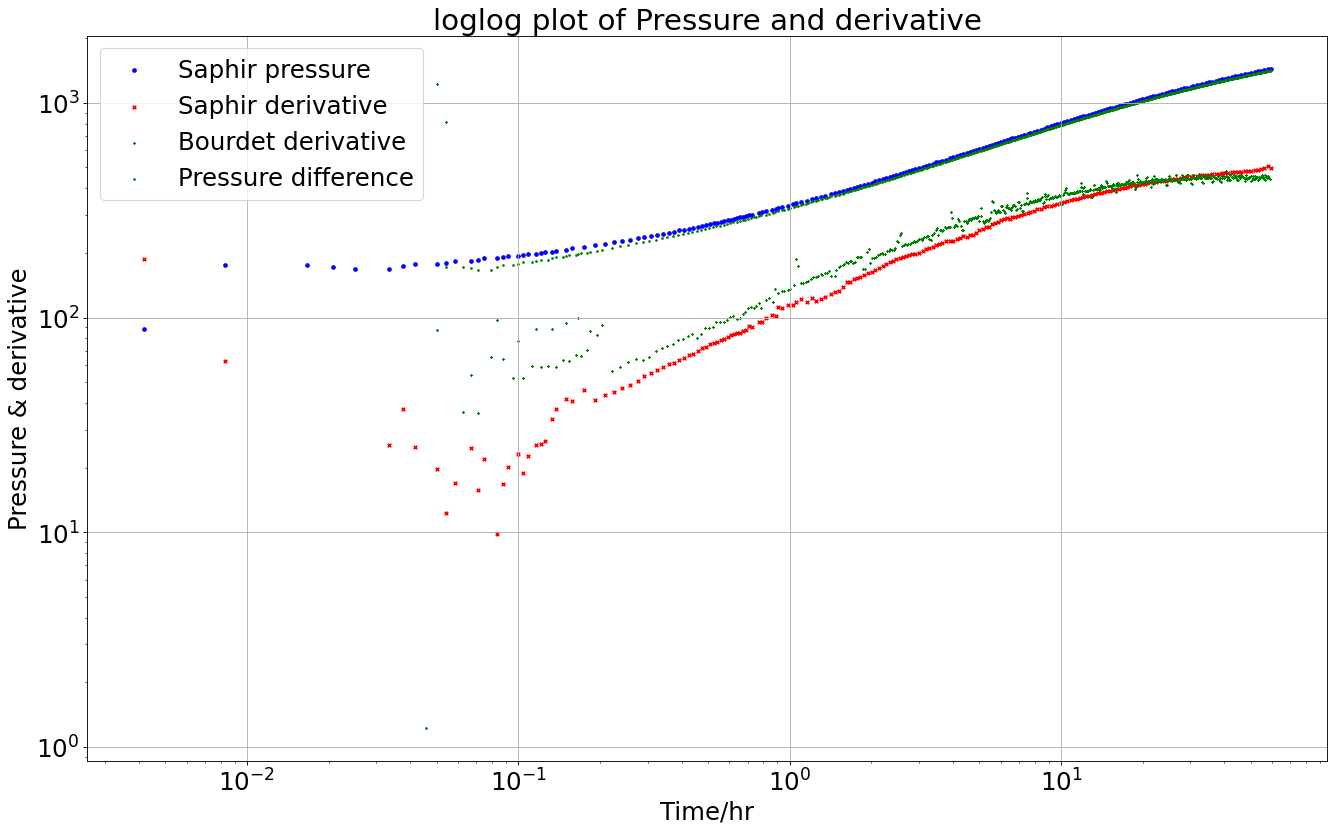

In [12]:
# plot the figure
plt.figure(figsize=(20,12),dpi=80)
plt.scatter(df3.t,df3.p,s = 10, marker = 'o',color = 'b',label = 'Saphir pressure')
plt.scatter(df3.t,df3.dp,s = 10, marker = 'x',color = 'r',label = 'Saphir derivative')

# plot the bourdet derivative
ttt_der,der,ttt,ppp = bourdet_der(median_rate_list,df_bhp_list,2,T_s,0.84)
plt.scatter(ttt_der,der,s = 2, marker = 'x',color = 'g',label = 'Bourdet derivative')
plt.scatter(ttt,ppp,s = 2, marker = 'o',color = 'g',label = 'Pressure difference')

#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')
# font size
plt.rcParams.update({'font.size': 22})
# grid
plt.grid()
plt.legend()
# title
plt.title('loglog plot of Pressure and derivative')

Text(0.5, 1.0, 'loglog plot of Pressure and derivative')

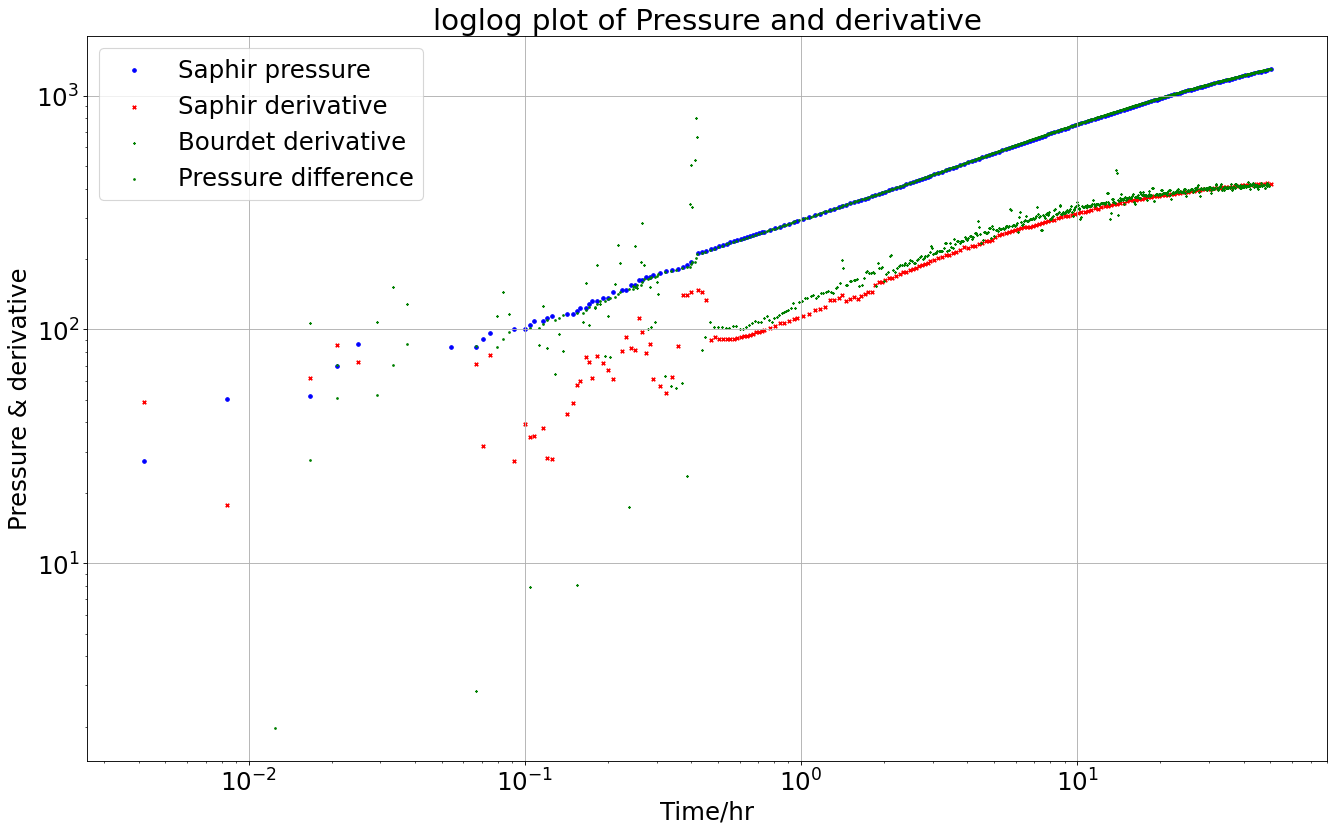

In [13]:

# plot the figure
plt.figure(figsize=(20,12),dpi=80)
plt.scatter(df2.t,df2.p,s = 10, marker = 'o',color = 'b',label = 'Saphir pressure')
plt.scatter(df2.t,df2.dp,s = 10, marker = 'x',color = 'r',label = 'Saphir derivative')

# plot the bourdet derivative
ttt_der,der,ttt,ppp = bourdet_der(median_rate_list,df_bhp_list,1,T_s,0.915)
plt.scatter(ttt_der,der,s = 2, marker = 'x',color = 'g',label = 'Bourdet derivative')
plt.scatter(ttt,ppp,s = 2, marker = 'o',color = 'g',label = 'Pressure difference')

#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')
# font size
plt.rcParams.update({'font.size': 22})
# grid
plt.grid()
plt.legend()
# title
plt.title('loglog plot of Pressure and derivative')

Text(0.5, 1.0, 'loglog plot of Pressure and derivative')

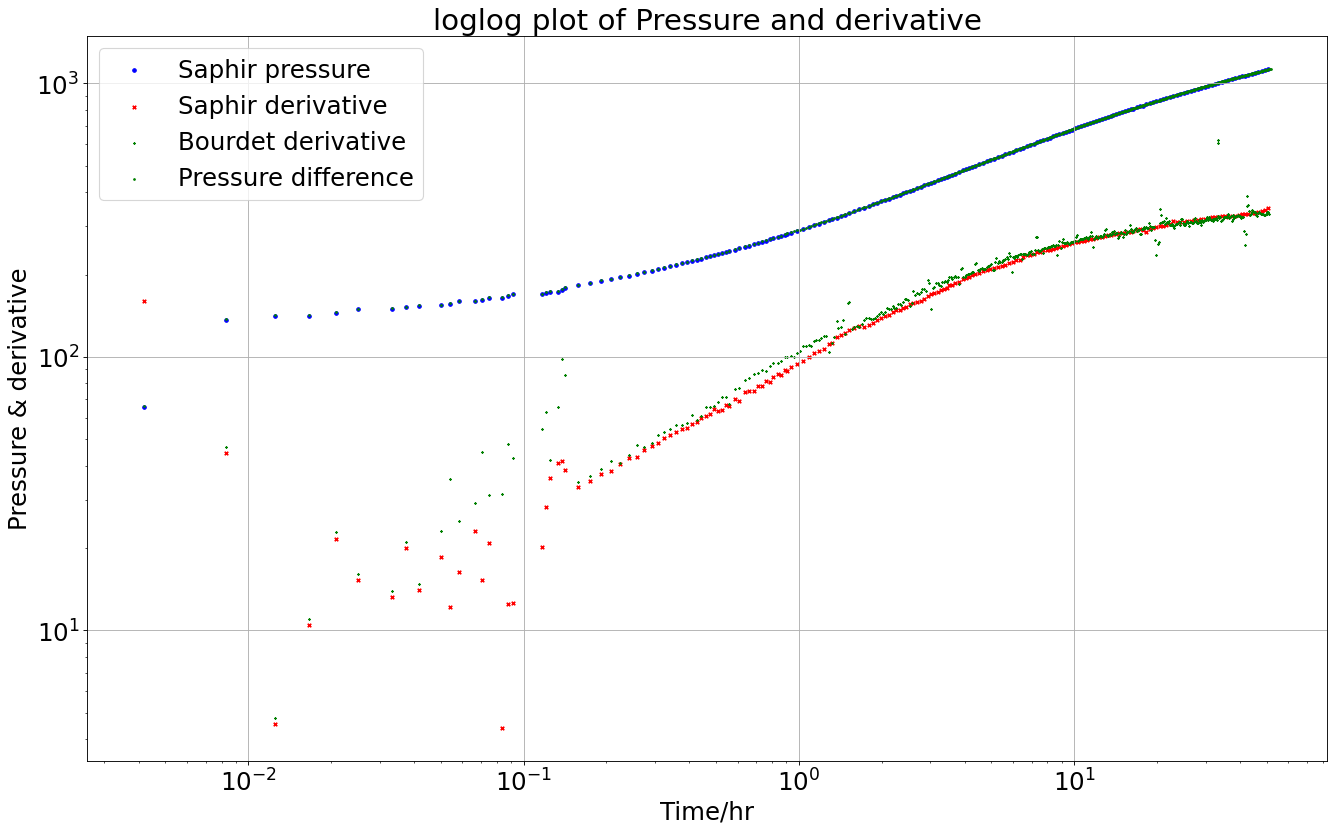

In [14]:
# plot the figure
plt.figure(figsize=(20,12),dpi=80)
plt.scatter(df1.t,df1.p,s = 10, marker = 'o',color = 'b',label = 'Saphir pressure')
plt.scatter(df1.t,df1.dp,s = 10, marker = 'x',color = 'r',label = 'Saphir derivative')

# plot the bourdet derivative
ttt_der,der,ttt,ppp = bourdet_der(median_rate_list,df_bhp_list,0,T_s,0.95)
plt.scatter(ttt_der,der,s = 2, marker = 'x',color = 'g',label = 'Bourdet derivative')
plt.scatter(ttt,ppp,s = 2, marker = 'o',color = 'g',label = 'Pressure difference')

#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')
# font size
plt.rcParams.update({'font.size': 22})
# grid
plt.grid()
plt.legend()
# title
plt.title('loglog plot of Pressure and derivative')

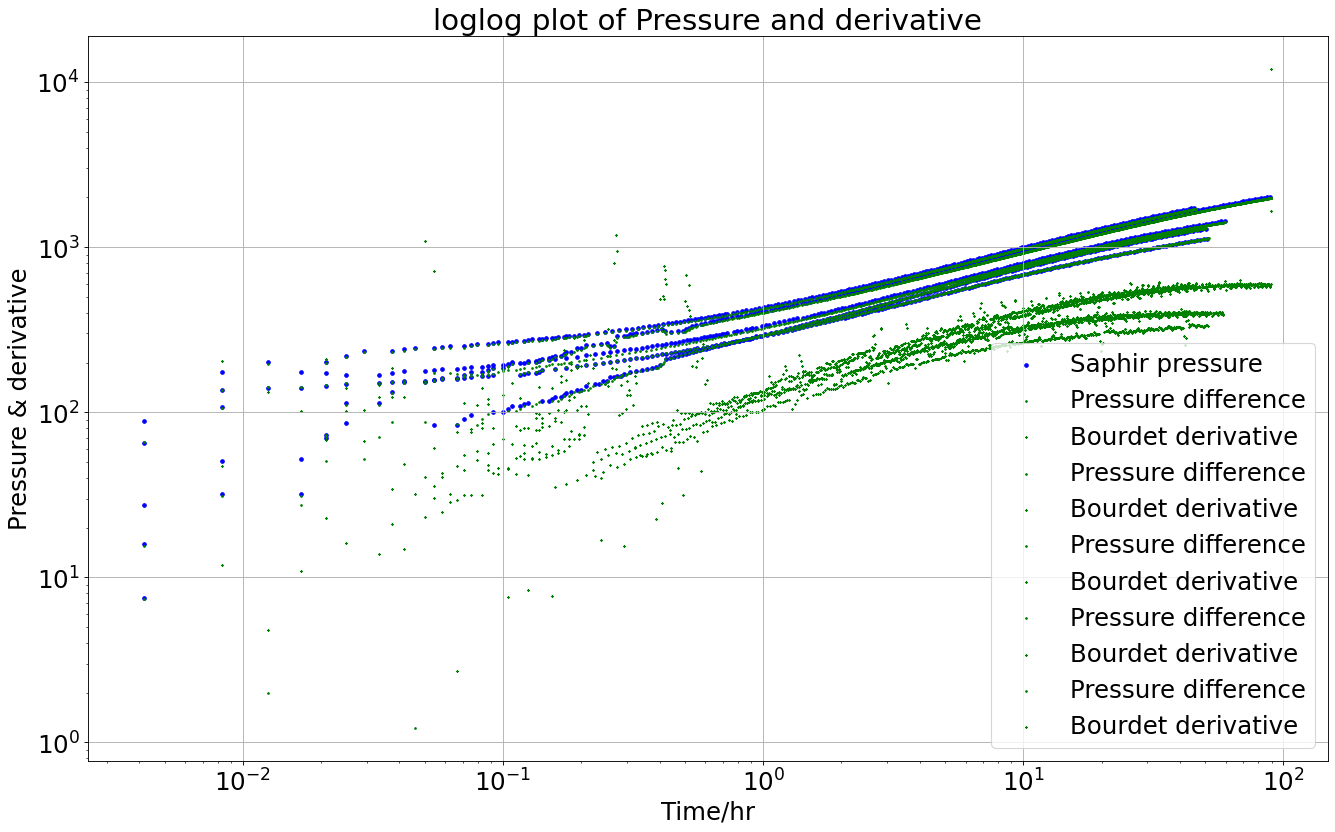

In [15]:

plt.figure(figsize=(20,12),dpi=80)
 # plot the figure from df1 to df5
plt.scatter(df1.t,df1.p,s = 10, marker = 'o',color = 'b',label = 'Saphir pressure')
plt.scatter(df2.t,df2.p,s = 10, marker = 'o',color = 'b')
plt.scatter(df3.t,df3.p,s = 10, marker = 'o',color = 'b')
plt.scatter(df4.t,df4.p,s = 10, marker = 'o',color = 'b')
plt.scatter(df5.t,df5.p,s = 10, marker = 'o',color = 'b')

# plot the bourdet derivative
for i in np.arange(len(T_s)):
    ttt_der,der,ttt,ppp = bourdet_der(median_rate_list,df_bhp_list,i,T_s,0.95)
    plt.scatter(ttt,ppp,s = 2, marker = 'o',color = 'g',label = 'Pressure difference')
    plt.scatter(ttt_der,der,s = 2, marker = 'x',color = 'g',label = 'Bourdet derivative')

#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')

# font size

plt.rcParams.update({'font.size': 22})
# grid
plt.grid()
plt.legend()
# title
plt.title('loglog plot of Pressure and derivative')
# show the figure
plt.show()